In [3]:
from model import *

model = FXModel(5, 100)
for i in range(model.max_steps - 1):
    model.step()

model.datacollector.get_model_vars_dataframe()

,Bid,Offer,Spread,Trades
0,1.133295,1.133322,0.268776,0
1,1.133450,1.133477,0.273483,0
2,1.132913,1.132939,0.261144,340
3,1.132638,1.132668,0.298564,320
4,1.132277,1.132309,0.321202,341
...,...,...,...,...
539,1.137017,1.137046,0.289931,416
540,1.138195,1.138223,0.275974,399
541,1.138025,1.138053,0.284748,417
542,1.138335,1.138366,0.303152,411


In [3]:
from mesa.batchrunner import batch_run

batch_run = batch_run(FXModel,
                        {"NumBanks": 5, "NumTraders": 50},
                        iterations=5,
                        max_steps=100)

import pandas as pd

pd.DataFrame(batch_run)

5it [00:32,  6.48s/it]


,RunId,iteration,Step,NumBanks,NumTraders,Bid,Offer,Spread,Trades
0,0,0,100,5,50,1.133266,1.133293,0.276667,186
1,1,1,100,5,50,1.133266,1.133293,0.276667,185
2,2,2,100,5,50,1.133266,1.133293,0.276667,205
3,3,3,100,5,50,1.133266,1.133293,0.276667,269
4,4,4,100,5,50,1.133266,1.133293,0.276667,162


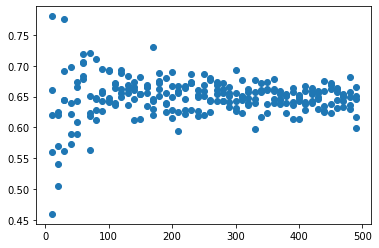

In [6]:
import matplotlib.pyplot as plt

run_data = batch_run.get_model_vars_dataframe()
run_data.head()
plt.scatter(run_data.N, run_data.Gini)

In [9]:
data_collector_agents = batch_run.get_collector_agents()

data_collector_agents[(10,2)]

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1
...              ...
99   5             2
     6             0
     7             4
     8             2
     9             0

[1000 rows x 1 columns]

In [10]:
data_collector_model = batch_run.get_collector_model()

data_collector_model[(10,1)]

,Gini
0,0.00
1,0.00
2,0.00
3,0.00
4,0.18
...,...
95,0.78
96,0.78
97,0.78
98,0.78
